In [1]:
import numpy as np
import scipy.stats as stats #new library
import matplotlib.pyplot as plt

In [3]:
np.random.seed(0)
exam_scores = 60 + np.random.randint(0, 15, size=12) + (32 % 5)
print("Sample Data (Exam Scores):", exam_scores)


Sample Data (Exam Scores): [74 67 62 65 73 65 69 71 65 67 64 66]


In [4]:
hypothesized_mean = 65


t_stat, p_value = stats.ttest_1samp(exam_scores, hypothesized_mean)


sample_mean = np.mean(exam_scores)
df = len(exam_scores) - 1
print("\n--- Hypothesis Test Result ---")
print(f"Sample Mean = {sample_mean:.2f}")
print(f"Hypothesized Mean = {hypothesized_mean}")
print(f"t-statistic = {t_stat:.4f}")
print(f"Degrees of Freedom = {df}")
print(f"p-value = {p_value:.4f}")


--- Hypothesis Test Result ---
Sample Mean = 67.33
Hypothesized Mean = 65
t-statistic = 2.1840
Degrees of Freedom = 11
p-value = 0.0515



95% Confidence Interval for Mean: (np.float64(64.98186714282707), np.float64(69.68479952383959))

Decision: Fail to Reject H0 → Sample mean is NOT significantly different from 65


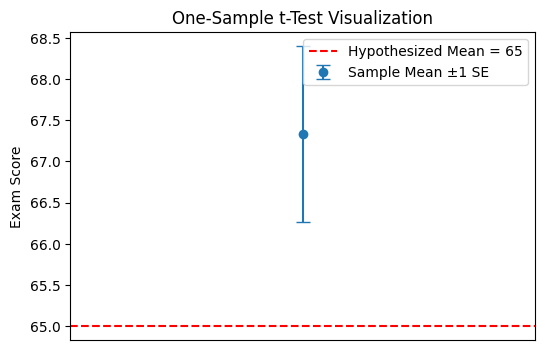

In [5]:
confidence_level = 0.95
sem = stats.sem(exam_scores)
ci = stats.t.interval(confidence_level, df, loc=sample_mean, scale=sem)

print("\n95% Confidence Interval for Mean:", ci)


alpha = 0.05
if p_value < alpha:
    decision = "Reject H0 → Sample mean is significantly different from 65"
else:
    decision = "Fail to Reject H0 → Sample mean is NOT significantly different from 65"

print("\nDecision:", decision)


plt.figure(figsize=(6, 4))
plt.errorbar(1, sample_mean, yerr=sem, fmt='o', capsize=5, label="Sample Mean ±1 SE")
plt.axhline(y=hypothesized_mean, color='r', linestyle='--', label="Hypothesized Mean = 65")
plt.xlim(0, 2)
plt.xticks([])
plt.ylabel("Exam Score")
plt.title("One-Sample t-Test Visualization")
plt.legend()
plt.show()